In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
iris_setosa = df_iris.iloc[: 50, :]
iris_versicolor = df_iris.iloc[50: 100, :]
iris_virginica = df_iris.iloc[100: , :]

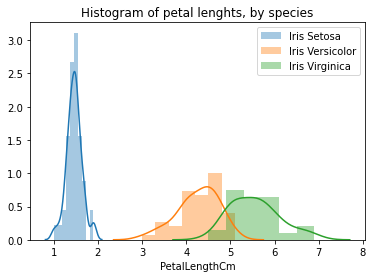

In [10]:
sns.distplot(a = iris_setosa['PetalLengthCm'], label = 'Iris Setosa')
sns.distplot(a = iris_versicolor['PetalLengthCm'], label = 'Iris Versicolor')
sns.distplot(a = iris_virginica['PetalLengthCm'], label = 'Iris Virginica')
plt.title('Histogram of petal lenghts, by species')
plt.legend()

In [12]:
df = df_iris.iloc[: 100, 2: 4]
df.head()

,SepalWidthCm,PetalLengthCm
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


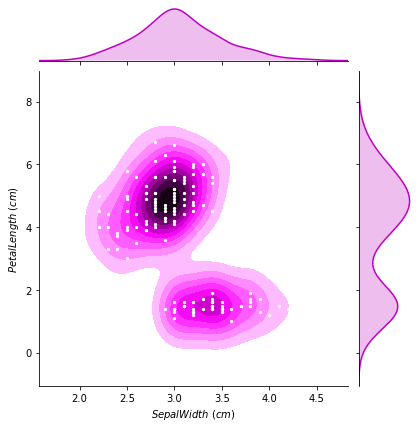

In [22]:
g = sns.jointplot(x = 'SepalWidthCm', y = 'PetalLengthCm', data = df_iris, kind = 'kde', color = 'm')
g.plot_joint(plt.scatter, c = 'w', linewidth = 1, s = 5)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$SepalWidth$ $(cm)$", "$PetalLength$ $(cm)$")

In [23]:
X = df.to_numpy()

In [25]:
y = df_iris.iloc[: 100, -1]

In [26]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [57]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
model_fit = svc.fit(X_train, y_train)

In [76]:
decision_function = model_fit.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [59]:
support_vectors

array([[2.3, 1.3],
       [3.3, 1.7],
       [3.2, 1.6],
       [2.5, 3. ],
       [3. , 1.6],
       [2.9, 3.6]])

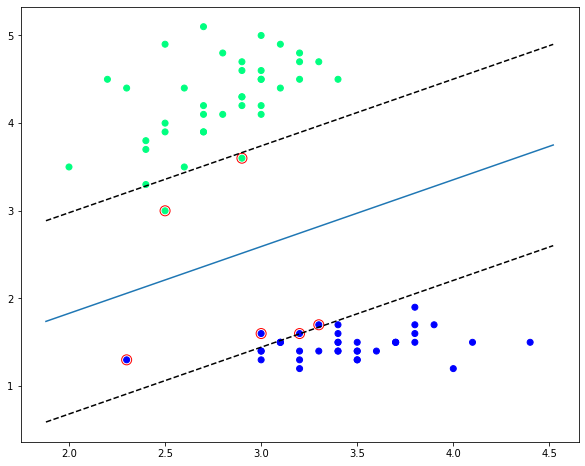

In [64]:
plt.figure(figsize = (10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter')
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s = 100, linewidth = 1, facecolors = 'none',
             edgecolors = 'r')

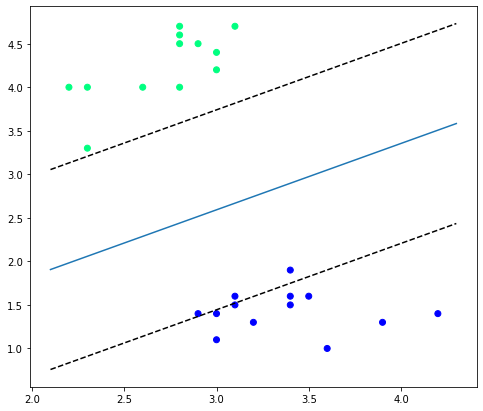

In [70]:
plt.figure(figsize = (8, 7))
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'winter')
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')


In [72]:
y_preds = svc.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

In [74]:
cm

array([[13,  0],
       [ 0, 12]])